<h1>3. Zeitreihen vorhersagen (Statistik I): Exponentielle Glättung und Holt-Winters</h1>
<h4>Session 3 (Donnerstag 13:30 – 15:00)</h4>
<br>
3.1 Naive Vorhersagen <br>
3.2 Einfaches exponentielles Glätten (SES) <br>
3.3 Holt-Verfahren / Holt-Winters-Verfahren <br>

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [2]:
airline = pd.read_csv('AirPassengers.csv',index_col='Month', parse_dates=True)
airline.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [4]:
airline.index.freq = 'MS'

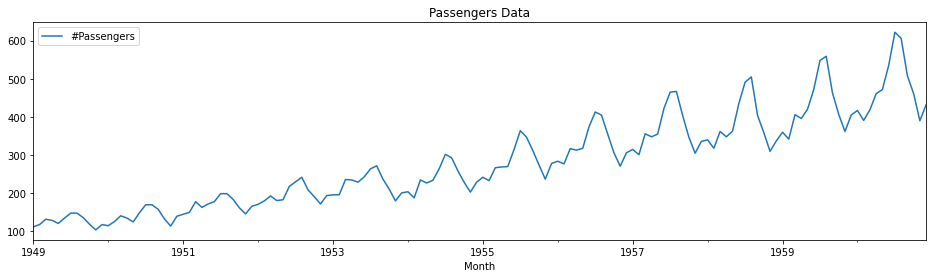

In [5]:
airline[['#Passengers']].plot(title='Passengers Data', figsize = (16,4));

<h2> Ein-Schritt-Vorhersagen</h2>

<h2>3.1 Naive Vorhersagen</h2>

In [26]:
airline['Naive'] = airline['#Passengers'].shift(periods=1, fill_value = 112)
airline.head(12)

,#Passengers,Naive,HWES1,HWES2_ADD,HWES3_ADD
Month,,,,,
1949-01-01,112,112,118.179051,120.527273,112.034175
1949-02-01,118,112,115.089525,114.102394,120.198998
1949-03-01,132,118,116.544763,120.040657,134.709356
1949-04-01,129,132,124.272381,134.001539,131.397488
1949-05-01,121,129,126.636191,131.085845,124.641271
1949-06-01,135,121,123.818095,123.110263,140.419419
1949-07-01,148,135,129.409048,137.001569,153.834372
1949-08-01,148,148,138.704524,150.007119,152.470133
1949-09-01,136,148,143.352262,150.071947,139.719392


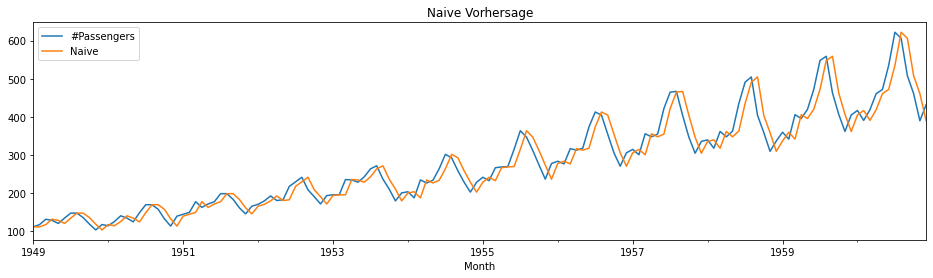

In [27]:
airline[['#Passengers','Naive']].plot(title='Naive Vorhersage', figsize = (16,4));

<h2>3.2 Einfaches exponentielles Glätten (SES)</h2>

In [14]:
airline['HWES1'] = SimpleExpSmoothing(airline['#Passengers']).fit(smoothing_level=.5).fittedvalues
airline.head().round(2)

,#Passengers,Naive,HWES1
Month,,,
1949-01-01,112,NaN,118.18
1949-02-01,118,112.0,115.09
1949-03-01,132,118.0,116.54
1949-04-01,129,132.0,124.27
1949-05-01,121,129.0,126.64


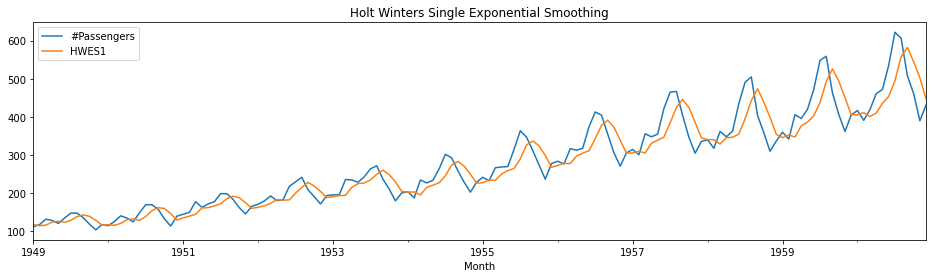

In [15]:
airline[['#Passengers','HWES1']].plot(title='Holt Winters Single Exponential Smoothing', figsize = (16,4));

<h2>3.3 Holt-Verfahren / Holt-Winters-Verfahren</h2>

In [16]:
airline['HWES2_ADD'] = ExponentialSmoothing(airline['#Passengers'],trend='add').fit().fittedvalues
airline.head(10).round(2)

,#Passengers,Naive,HWES1,HWES2_ADD
Month,,,,
1949-01-01,112,NaN,118.18,120.53
1949-02-01,118,112.0,115.09,114.10
1949-03-01,132,118.0,116.54,120.04
1949-04-01,129,132.0,124.27,134.00
1949-05-01,121,129.0,126.64,131.09
1949-06-01,135,121.0,123.82,123.11
1949-07-01,148,135.0,129.41,137.00
1949-08-01,148,148.0,138.70,150.01
1949-09-01,136,148.0,143.35,150.07


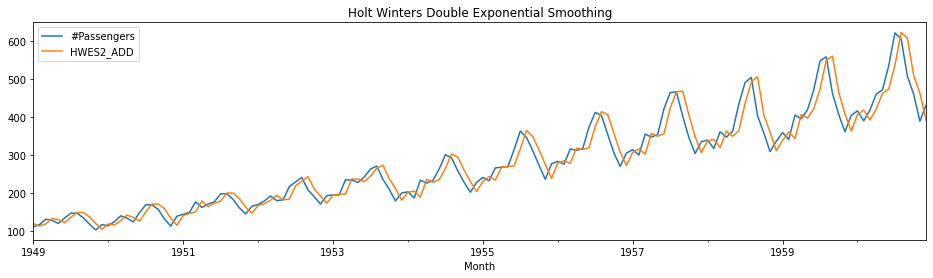

In [17]:
airline[['#Passengers','HWES2_ADD']].plot(title='Holt Winters Double Exponential Smoothing', figsize = (16,4));

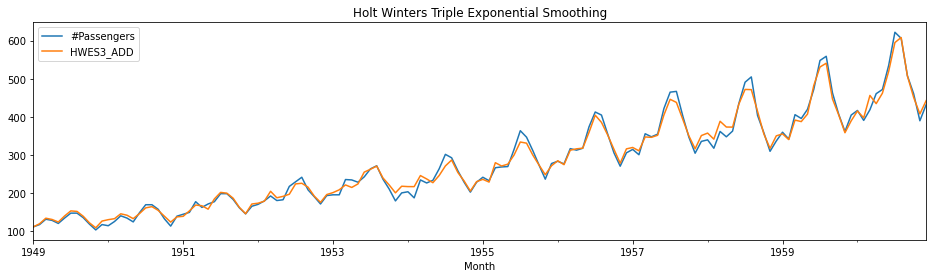

In [18]:
airline['HWES3_ADD'] = ExponentialSmoothing(airline['#Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
airline[['#Passengers','HWES3_ADD']].plot(title='Holt Winters Triple Exponential Smoothing', figsize = (16,4));

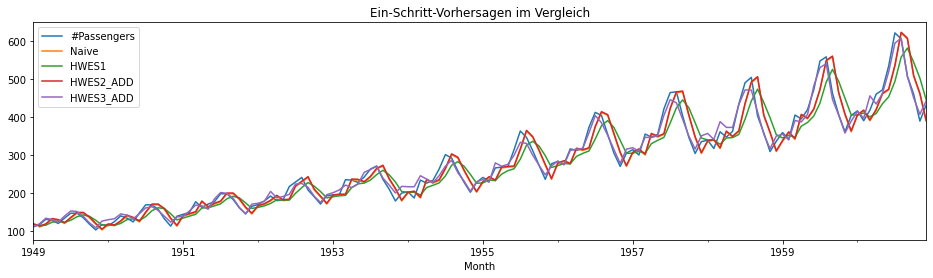

In [19]:
airline.plot(title='Ein-Schritt-Vorhersagen im Vergleich', figsize = (16,4));

<h3>Wie gut sind meine Vorhersagen?</h3>

In [28]:
y_tru = airline['#Passengers']
y_naiv = airline['Naive']
y_ses = airline['HWES1']
y_holt = airline['HWES2_ADD']
y_holtwinter = airline['HWES3_ADD']

errors = [['Mean Absolute Error', mean_absolute_error(y_tru,y_naiv), mean_absolute_error(y_tru,y_ses), mean_absolute_error(y_tru,y_holt), mean_absolute_error(y_tru,y_holtwinter)], ['Mean Squared Error', mean_squared_error(y_tru,y_naiv), mean_squared_error(y_tru,y_ses), mean_squared_error(y_tru,y_holt), mean_squared_error(y_tru,y_holtwinter)]] 
errors = pd.DataFrame(errors, columns = ['Art des Fehlers','Naive Vorhersage', 'SES Vorhersage', 'Holt Vorhersage', 'Holt-Winter Vorhersage']) 
errors.set_index('Art des Fehlers', inplace=True) 
errors = round(errors, 2)
errors 


,Naive Vorhersage,SES Vorhersage,Holt Vorhersage,Holt-Winter Vorhersage
Art des Fehlers,,,,
Mean Absolute Error,25.68,30.86,25.6,9.41
Mean Squared Error,1128.50,1729.48,1127.6,149.75


<div class="alert alert-info">
- Lade bzw. erstelle die Windstromerzeugungsdaten, die du schon einmal verwendet hattest<br>
- Mache analog zu diesem Beispiel Ein-Schritt-Vorhersagen für die Daten nach den besprochenen Methoden: Naive Vorhersage, SES Vorhersage, Holt's Vorhersage und Holt-Winter's Vorhersage<br>
- Bestimme die Fehlermaße: Welches Modell schneidet am besten / schlechtesten ab?
</div>

<h2>Vorhersagen über mehrere Schritte treffen</h2>

In [29]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   #Passengers  144 non-null    int64  
 1   Naive        144 non-null    int64  
 2   HWES1        144 non-null    float64
 3   HWES2_ADD    144 non-null    float64
 4   HWES3_ADD    144 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 6.8 KB


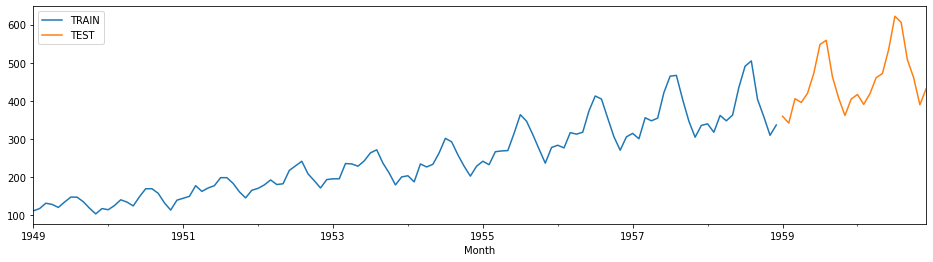

In [30]:
fc = pd.read_csv('AirPassengers.csv',index_col='Month', parse_dates=True)
fc.index.freq = 'MS'
train_airline = fc[:120]
test_airline = fc[120:]
train_airline['#Passengers'].plot(legend=True,label='TRAIN')
test_airline['#Passengers'].plot(legend=True,label='TEST',figsize=(16,4));

<h3>Naive Vorhersagen</h3>

In [31]:
naive_pred = pd.DataFrame().reindex_like(test_airline)
naive_pred['#Passengers'] = pd.to_numeric(train_airline['#Passengers'].iloc[-1])
naive_pred.head()

,#Passengers
Month,
1959-01-01,337
1959-02-01,337
1959-03-01,337
1959-04-01,337
1959-05-01,337


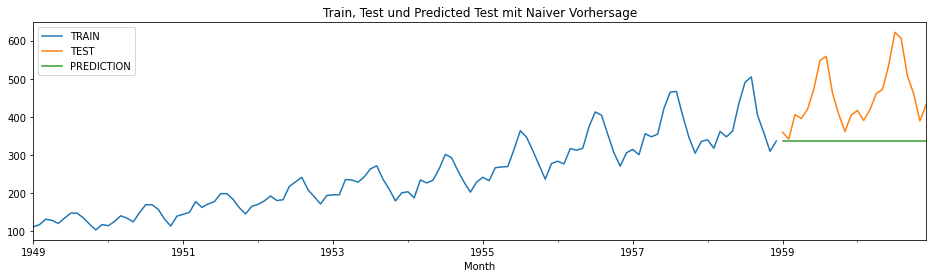

In [38]:
train_airline['#Passengers'].plot(legend=True,label='TRAIN')
test_airline['#Passengers'].plot(legend=True,label='TEST',figsize=(16,4))
naive_pred['#Passengers'].plot(legend=True,label='PREDICTION')
plt.title('Train, Test und Predicted Test mit Naiver Vorhersage');

<h3>Vorhersagen mit SES</h3>

In [35]:
SES_model = SimpleExpSmoothing(train_airline['#Passengers']).fit()
SES_pred = SES_model.forecast(24)

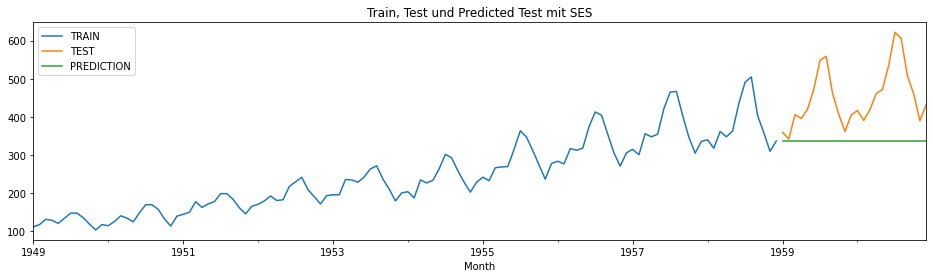

In [37]:
train_airline['#Passengers'].plot(legend=True,label='TRAIN')
test_airline['#Passengers'].plot(legend=True,label='TEST',figsize=(16,4))
SES_pred.plot(legend=True,label='PREDICTION')
plt.title('Train, Test und Predicted Test mit SES');

<h3>Vorhersagen mit Holt's Double ES</h3>

In [39]:
HWES2_model = ExponentialSmoothing(train_airline['#Passengers'],trend='add').fit()
HWES2_pred = HWES2_model.forecast(24)

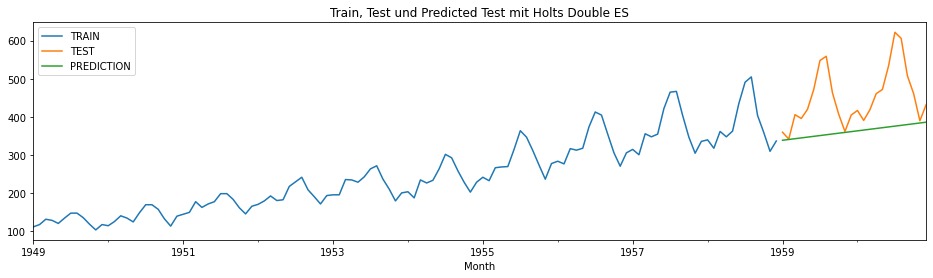

In [44]:
train_airline['#Passengers'].plot(legend=True,label='TRAIN')
test_airline['#Passengers'].plot(legend=True,label='TEST',figsize=(16,4))
HWES2_pred.plot(legend=True,label='PREDICTION')
plt.title('Train, Test und Predicted Test mit Holts Double ES');

<h3>Vorhersagen mit Holt-Winter's Triple ES</h3>

In [41]:
HWES3_model = ExponentialSmoothing(train_airline['#Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit()
HWES3_pred = HWES3_model.forecast(24)

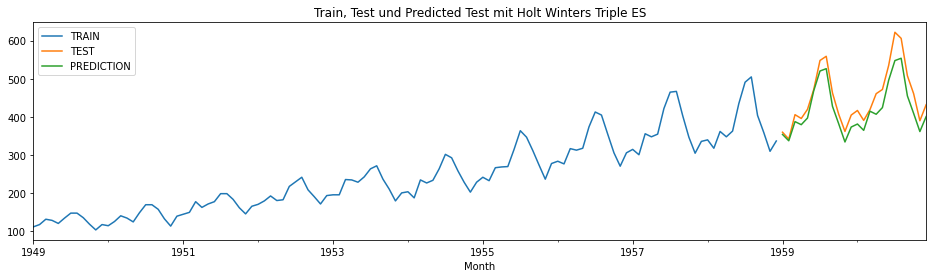

In [43]:
train_airline['#Passengers'].plot(legend=True,label='TRAIN')
test_airline['#Passengers'].plot(legend=True,label='TEST',figsize=(16,4))
HWES3_pred.plot(legend=True,label='PREDICTION')
plt.title('Train, Test und Predicted Test mit Holt Winters Triple ES');

<h3>Fehlermaße: Wie gut sind meine Vorhersagen?</h3>

In [46]:
errors = [['Mean Absolute Error', mean_absolute_error(test_airline,naive_pred), mean_absolute_error(test_airline,SES_pred), mean_absolute_error(test_airline,HWES2_pred), mean_absolute_error(test_airline,HWES3_pred)], ['Mean Squared Error', mean_squared_error(test_airline,naive_pred), mean_squared_error(test_airline,SES_pred), mean_squared_error(test_airline,HWES2_pred), mean_squared_error(test_airline,HWES3_pred)]] 
errors = pd.DataFrame(errors, columns = ['Art des Fehlers','Naive Vorhersage', 'SES Vorhersage', 'Holt Vorhersage', 'Holt-Winter Vorhersage']) 
errors.set_index('Art des Fehlers', inplace=True) 
errors = round(errors, 2)
errors 

,Naive Vorhersage,SES Vorhersage,Holt Vorhersage,Holt-Winter Vorhersage
Art des Fehlers,,,,
Mean Absolute Error,115.25,115.25,89.65,31.07
Mean Squared Error,18859.25,18859.25,12996.37,1278.52


<h3>Stromlast vorhersagen</h3>

In [50]:
em = pd.read_csv("em_HH8_2012_05.csv", index_col=0)
em['Zeit'] = pd.to_datetime(em['Zeit'])
em.set_index('Zeit', inplace=True)
em.index.freq = 'H'
em.head()

,Strom
Zeit,
2012-05-01 00:00:00,834.0
2012-05-01 01:00:00,824.0
2012-05-01 02:00:00,681.0
2012-05-01 03:00:00,530.0
2012-05-01 04:00:00,672.0


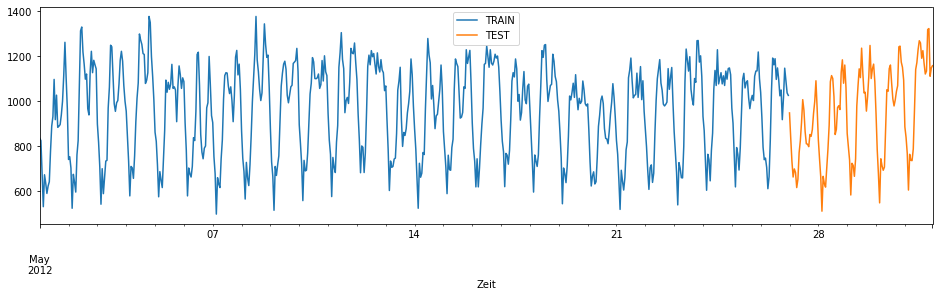

In [53]:
train_em = em[:624]
test_em = em[624:]
train_em['Strom'].plot(legend=True,label='TRAIN')
test_em['Strom'].plot(legend=True,label='TEST',figsize=(16,4));

<div class="alert alert-info">
- Jetzt wird es ernst: Mache eine Mehrschrittvorhersage (120 Schritte) nach Holt-Winters für die Testzeitspanne<br>
- Plotte die Ergebnisse deiner Vorhersage in den obigen Plot dazu (Tipp: Kopiere den obigen Code und füge eine neue Zeile ein, die pred.plot() enthält (oder wie auch immer du deine Vorhersagen genannt hast).plot()<br>
- Uuund? Wie war das Modell??<br>
- Füge deinen Daten das Label 'PREDICTION' hinzu<br>
- Berechne wie in den obigen Beispielen die Fehlermaße
</div>

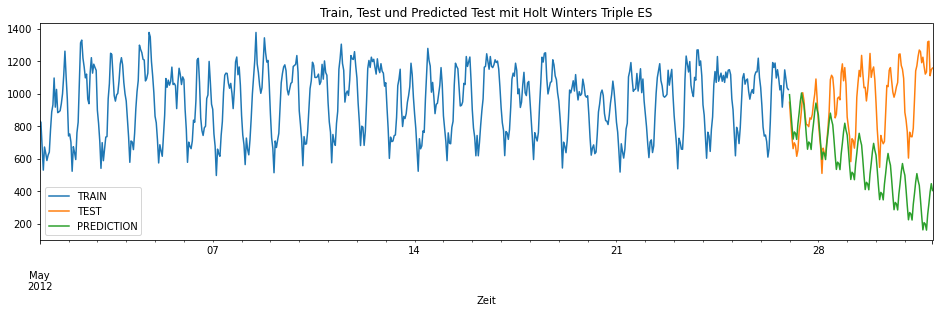

In [62]:
HWES3_em_model = ExponentialSmoothing(train_em['Strom'],trend='add',seasonal='add',seasonal_periods=12).fit()
HWES3_em_pred = HWES3_em_model.forecast(120)
train_em['Strom'].plot(legend=True,label='TRAIN')
test_em['Strom'].plot(legend=True,label='TEST',figsize=(16,4))
HWES3_em_pred.plot(legend=True,label='PREDICTION')
plt.title('Train, Test und Predicted Test mit Holt Winters Triple ES');

In [ ]:
print(f'Mean Absolute Error Holt-Winter = {mean_absolute_error(test_em,HWES3_em_pred).round(2)}')
print(f'Mean Squared Error Holt-Winter = {mean_squared_error(test_em,HWES3_em_pred).round(2)}')